In [171]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../src")

In [172]:
!pwd

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks


# 1. Import a phase information

In [173]:
import constants

In [174]:
constants.constants_help('phase')

Almandine-pyrope
Grossular
Majorite
Pyrope
a_quartz_1
a_quartz_2
a_Quartz_3
a_quartz_4
a_quartz_696C
a_quartz_700C
Calcite_1
Calcite_2
Forsterite (San Carlos)
Fayalite (0.3GPa)
Lawsonite
Orthoenstatite (MgSiO3)
Orthoenstatite (MgSiO3)
Enstatite
Bronzite (Mg0.8Fe0.2SiO3)
Ferrosilite (FeSiO3)
Biotite
Muscovite
Phlogopite
Illite-smectite
Dickite
Augite
Diopside (Di72He9Jd3Cr3Ts12)
Chrome-diopside
Jadeite
Omphacite
Coesite
Amphobole #1 Richterite1
Amphobole #2 Kataphorite1
Amphobole #3 Taramite-Tschermakite1
Amphobole #4 Hornblende-Tschermakite1
Amphobole #5 Tremolite1
Amphobole #6 Edenite1
Amphobole #7 Edenite1
Amphobole #8 Pargasite1
Amphobole #9 Pargasite1
Hornblende (#1)
Hornblende (#2)
Glaucophane
Sanidine (Or83Ab15)
Sanidine (Or89Ab11)
Orthoclase (Or93Ab7)
Albite (Or0Ab100)
An0 (Albite)
An25 (Oligoclase)
An37 (Andesine)
An48 (Andesine)
An60 (Labradorite)
An67 (Labradorite)
An78 (Bytownite)
An96 (Anorthite)
Kaolinite
Nacrite


In [175]:
# voigt_ = np.array(constants.get_voigt_phase("Nacrite"))
# print(voigt_)
voigt_ = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
voigt_ = voigt_*10**9

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [176]:
import tensor_conversion

In [177]:
voigt_stiffness = np.array([[16.1,   15.967,  15.967,   0.,      0,   0.   ],
                            [ 15.967, 16.1,   15.967,    0.,      0,   0.   ],
                            [ 15.967,  15.967,  16.1,    0.,     0,    0.   ],
                            [  0.,      0.,      0.,     0.01,    0.,      0],
                            [  0,   0,  0,    0.,     0.01,    0.   ],
                            [  0.,      0.,     0.,      0,   0.,     0.01 ]])

voigt_melt = np.array([[16.1,   15.967,  15.967,   0.,      0,   0.   ],
                            [ 15.967, 16.1,   15.967,    0.,      0,   0.   ],
                            [ 15.967,  15.967,  16.1,    0.,     0,    0.   ],
                            [  0.,      0.,      0.,     0.01,    0.,      0],
                            [  0,   0,  0,    0.,     0.01,    0.   ],
                            [  0.,      0.,     0.,      0,   0.,     0.01 ]])

In [178]:
melt_tensor = tensor_conversion.voigt_to_tensor(voigt_melt)

print(np.array(melt_tensor))

[[[[1.6100e+01 0.0000e+00 0.0000e+00]
   [0.0000e+00 1.5967e+01 0.0000e+00]
   [0.0000e+00 0.0000e+00 1.5967e+01]]

  [[0.0000e+00 1.0000e-02 0.0000e+00]
   [1.0000e-02 0.0000e+00 0.0000e+00]
   [0.0000e+00 0.0000e+00 0.0000e+00]]

  [[0.0000e+00 0.0000e+00 1.0000e-02]
   [0.0000e+00 0.0000e+00 0.0000e+00]
   [1.0000e-02 0.0000e+00 0.0000e+00]]]


 [[[0.0000e+00 1.0000e-02 0.0000e+00]
   [1.0000e-02 0.0000e+00 0.0000e+00]
   [0.0000e+00 0.0000e+00 0.0000e+00]]

  [[1.5967e+01 0.0000e+00 0.0000e+00]
   [0.0000e+00 1.6100e+01 0.0000e+00]
   [0.0000e+00 0.0000e+00 1.5967e+01]]

  [[0.0000e+00 0.0000e+00 0.0000e+00]
   [0.0000e+00 0.0000e+00 1.0000e-02]
   [0.0000e+00 1.0000e-02 0.0000e+00]]]


 [[[0.0000e+00 0.0000e+00 1.0000e-02]
   [0.0000e+00 0.0000e+00 0.0000e+00]
   [1.0000e-02 0.0000e+00 0.0000e+00]]

  [[0.0000e+00 0.0000e+00 0.0000e+00]
   [0.0000e+00 0.0000e+00 1.0000e-02]
   [0.0000e+00 1.0000e-02 0.0000e+00]]

  [[1.5967e+01 0.0000e+00 0.0000e+00]
   [0.0000e+00 1.5967e+01 0.00

In [179]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [180]:
print(np.array(voigt))

print(voigt == voigt_stiffness)

[[1.9896e+11 7.3595e+10 6.8185e+10 0.0000e+00 9.7350e+09 0.0000e+00]
 [7.3595e+10 1.5594e+11 6.2230e+10 0.0000e+00 6.2950e+09 0.0000e+00]
 [6.8185e+10 6.2230e+10 2.2599e+11 0.0000e+00 3.3850e+10 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 6.5660e+10 0.0000e+00 6.4150e+09]
 [9.7350e+09 6.2950e+09 3.3850e+10 0.0000e+00 6.0230e+10 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 6.4150e+09 0.0000e+00 6.5180e+10]]
[[False False False  True False  True]
 [False False False  True False  True]
 [False False False  True False  True]
 [ True  True  True False  True False]
 [False False False  True False  True]
 [ True  True  True False  True False]]


In [181]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[1.9896e+11 0.0000e+00 9.7350e+09]
   [0.0000e+00 7.3595e+10 0.0000e+00]
   [9.7350e+09 0.0000e+00 6.8185e+10]]

  [[0.0000e+00 6.5180e+10 0.0000e+00]
   [6.5180e+10 0.0000e+00 6.4150e+09]
   [0.0000e+00 6.4150e+09 0.0000e+00]]

  [[9.7350e+09 0.0000e+00 6.0230e+10]
   [0.0000e+00 6.2950e+09 0.0000e+00]
   [6.0230e+10 0.0000e+00 3.3850e+10]]]


 [[[0.0000e+00 6.5180e+10 0.0000e+00]
   [6.5180e+10 0.0000e+00 6.4150e+09]
   [0.0000e+00 6.4150e+09 0.0000e+00]]

  [[7.3595e+10 0.0000e+00 6.2950e+09]
   [0.0000e+00 1.5594e+11 0.0000e+00]
   [6.2950e+09 0.0000e+00 6.2230e+10]]

  [[0.0000e+00 6.4150e+09 0.0000e+00]
   [6.4150e+09 0.0000e+00 6.5660e+10]
   [0.0000e+00 6.5660e+10 0.0000e+00]]]


 [[[9.7350e+09 0.0000e+00 6.0230e+10]
   [0.0000e+00 6.2950e+09 0.0000e+00]
   [6.0230e+10 0.0000e+00 3.3850e+10]]

  [[0.0000e+00 6.4150e+09 0.0000e+00]
   [6.4150e+09 0.0000e+00 6.5660e+10]
   [0.0000e+00 6.5660e+10 0.0000e+00]]

  [[6.8185e+10 0.0000e+00 3.3850e+10]
   [0.0000e+00 6.2230e+10 0.00

# 2. Tensor rotation

In [182]:
import tensor_rotation
import tensor_conversion

In [183]:
import numpy as np
import pandas as pd
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
             [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
             [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
             [  0.,      0.,      0.,     65.66,    0.,      6.415],
             [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
              [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])

tensor = tensor_conversion.voigt_to_tensor(voigt_)

print("Original tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor))))

alpha = 30 # Rotation angle around x axis in degrees
beta = 50 # Rotation angle around y axis in degrees
gamma = 80    # Rotation angle around z axis in degrees
output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

Original tensor in voigt matrix convention:
              0             1             2             3             4  \
0  1.989600e+11  7.359500e+10  6.818500e+10  0.000000e+00  9.735000e+09   
1  7.359500e+10  1.559400e+11  6.223000e+10  0.000000e+00  6.295000e+09   
2  6.818500e+10  6.223000e+10  2.259900e+11  0.000000e+00  3.385000e+10   
3  0.000000e+00  0.000000e+00  0.000000e+00  6.566000e+10  0.000000e+00   
4  9.735000e+09  6.295000e+09  3.385000e+10  0.000000e+00  6.023000e+10   
5  0.000000e+00  0.000000e+00  0.000000e+00  6.415000e+09  0.000000e+00   

              5  
0  0.000000e+00  
1  0.000000e+00  
2  0.000000e+00  
3  6.415000e+09  
4  0.000000e+00  
5  6.518000e+10  


In [184]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(output))))

Output rotated tensor in voigt matrix convention:
              0             1             2             3             4  \
0  1.636937e+11  5.522020e+10  7.733802e+10  5.086870e+09  7.071287e+09   
1  5.522020e+10  1.625955e+11  8.012064e+10  2.703473e+09  1.693446e+09   
2  7.733802e+10  8.012064e+10  2.372631e+11 -1.649570e+10  1.009847e+10   
3  5.086870e+09  2.703473e+09 -1.649570e+10  7.242763e+10 -3.653123e+09   
4  7.071287e+09  1.693446e+09  1.009847e+10 -3.653123e+09  7.387293e+10   
5 -5.303336e+09  6.120997e+09 -4.779734e+09  3.255414e+09 -5.746486e+08   

              5  
0 -5.303336e+09  
1  6.120997e+09  
2 -4.779734e+09  
3  3.255414e+09  
4 -5.746486e+08  
5  5.343829e+10  


# 3. Calculating Christoffel tensors

In [185]:
import christoffel

In [186]:
import tensor_conversion
tensor_M = tensor_conversion.voigt_to_tensor(voigt_melt*10**9)
stiffness = tensor_M
direction = np.array([1, 0, 0])
density = 3500.0
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[1.61e+10 0.00e+00 0.00e+00]
 [0.00e+00 1.00e+07 0.00e+00]
 [0.00e+00 0.00e+00 1.00e+07]]
Wave moduli:
[16100000000.000002, 10000000.0, 10000000.0]
Velocities:
[2144.7610589527217, 53.45224838248488, 53.45224838248488]
Polarization directions:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# 4. Calculating velocity

In [187]:
import christoffel_wave_prop

In [188]:
import numpy as np
import tensor_conversion

cijkl = tensor_conversion.voigt_to_tensor(voigt_melt*10**9)
rho = 3500

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)
print(200*((max(vp)-min(vp))/(max(vp)+min(vp))))

The values of vp are:
Min Vp:  2.1397376255580776
Max Vp:  2.144761058952722
The values of vs1 are:
Min Vs1:  0.053452248382484885
Max Vs1:  0.13784048752090433
The values of vs2 are:
Min Vs2:  0.05345224838248487
Max Vs2:  0.11639594881245384
0.23449340352490597


# 5. Anisotropy plot

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks/../src/cijkl_2dplots_vp.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


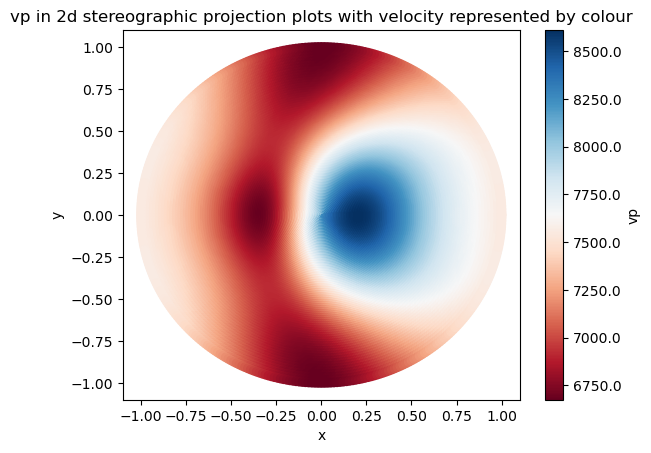

In [189]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

cijkl = tensor_conversion.voigt_to_tensor(voigt_)

rho = 3500

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)

# Solidus and liquidus

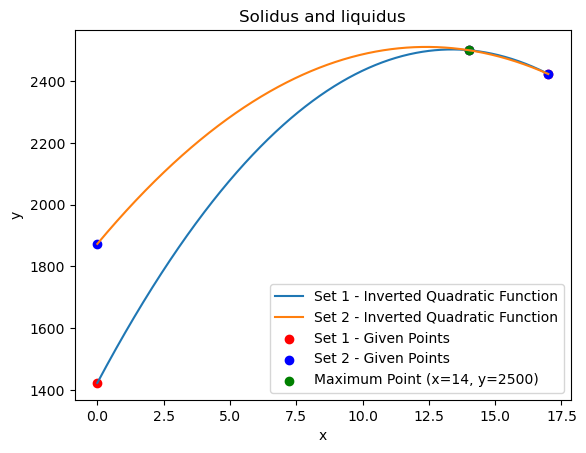

In [190]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

def inverted_quadratic_interpolation(x0, y0, x1, y1, x2, y2):
    x, a, b, c = symbols('x a b c')
    
    # Quadratic equation: y = ax^2 + bx + c
    eq1 = a*x0**2 + b*x0 + c - y0
    eq2 = a*x1**2 + b*x1 + c - y1
    eq3 = a*x2**2 + b*x2 + c - y2
    
    # Solving the system of equations
    solution = solve((eq1, eq2, eq3), (a, b, c))
    
    # Forming the quadratic function
    a_val, b_val, c_val = solution[a], solution[b], solution[c]
    quadratic_function = a_val*x**2 + b_val*x + c_val
    
    return quadratic_function

# Given points for the first set
x0_1, y0_1 = 0, 1423
x1_1, y1_1 = 17, 2423
x2_1, y2_1 = 14, 2500

# Get the inverted quadratic function for the first set
quadratic_function_1 = inverted_quadratic_interpolation(x0_1, y0_1, x1_1, y1_1, x2_1, y2_1)

# Given points for the second set
x0_2, y0_2 = 0, 1873
x1_2, y1_2 = 17, 2423
x2_2, y2_2 = 14, 2500

# Get the inverted quadratic function for the second set
quadratic_function_2 = inverted_quadratic_interpolation(x0_2, y0_2, x1_2, y1_2, x2_2, y2_2)

# Generate x values for plotting
x_values = np.linspace(0, 17, 1000)

# Calculate y values for both functions
y_values_1 = [quadratic_function_1.subs('x', val) for val in x_values]
y_values_2 = [quadratic_function_2.subs('x', val) for val in x_values]

# Plot both quadratic functions
plt.plot(x_values, y_values_1, label='Set 1 - Inverted Quadratic Function')
plt.plot(x_values, y_values_2, label='Set 2 - Inverted Quadratic Function')

# Mark the given points for both sets
plt.scatter([x0_1, x1_1, x2_1], [y0_1, y1_1, y2_1], color='red', label='Set 1 - Given Points')
plt.scatter([x0_2, x1_2, x2_2], [y0_2, y1_2, y2_2], color='blue', label='Set 2 - Given Points')

# Mark the maximum point for both sets
plt.scatter(14, 2500, color='green', label='Maximum Point (x=14, y=2500)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solidus and liquidus')
plt.legend()

# Show the plot
plt.show()


2D Matrix:


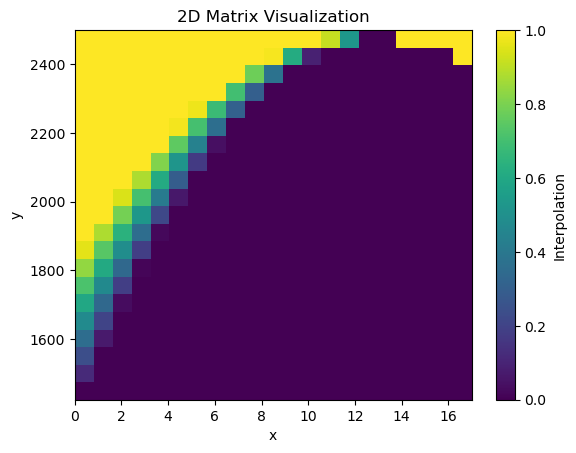

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x_values = np.linspace(0, 17, 21)
y_values = np.linspace(1423, 2500, 21)

# Generate the 2D matrix
matrix = np.zeros((len(y_values), len(x_values)))

# Fill the matrix with values
for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        # Given equations
        y1 = -4309 * x**2 / 714 + 115253 * x / 714 + 1423
        y2 = -2959 * x**2 / 714 + 73403 * x / 714 + 1873

        # Interpolate values between y1 and y2
        if y < y1:
            matrix[i, j] = 0
        elif y > y2:
            matrix[i, j] = 1
        else:
            matrix[i, j] = (y - y1) / (y2 - y1)

# Display the 2D matrix
print("2D Matrix:")
# print(matrix)

# Plot the 2D matrix
plt.imshow(matrix, cmap='viridis', extent=[0, 17, 1423, 2500], origin='lower', aspect='auto')
plt.colorbar(label='Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Matrix Visualization')
plt.show()


In [192]:
print(matrix)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.11966667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.23933333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.359      0.07148482 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.47866667 0.20559195 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

In [193]:
transmat = (1-matrix).T

print(transmat)

[[1.         0.88033333 0.76066667 0.641      0.52133333 0.40166667
  0.282      0.16233333 0.04266667 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.         1.         0.92851518 0.79440805 0.66030092
  0.52619379 0.39208666 0.25797953 0.1238724  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.         1.         1.         1.         0.96549031
  0.81415036 0.6628104  0.51147044 0.36013048 0.20879052 0.05745057
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         0.98537603 0.81323801 0.64109998 0.46896195 0.29682393
  0.1246859  0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         0

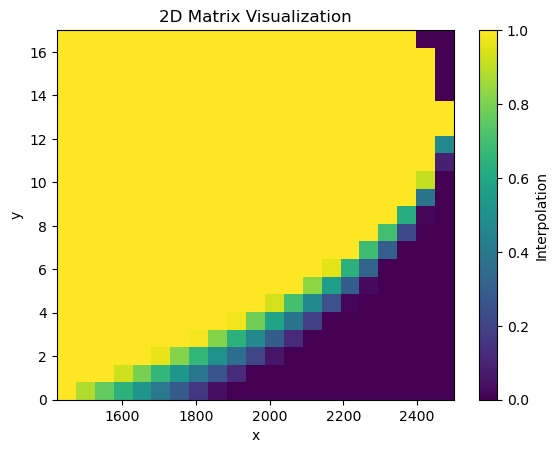

In [194]:
plt.imshow(transmat, cmap='viridis', extent=[1423, 2500, 0, 17], origin='lower', aspect='auto')
plt.colorbar(label='Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Matrix Visualization')
plt.show()

# Loops

In [195]:
import elastictensors

In [196]:
elastictensors.calculate_tensor_deriv("forsterite", 1, 200)

array([[340.18,  69.61,  74.46,   0.  ,   0.  ,   0.  ],
       [ 69.61, 209.17,  78.37,   0.  ,   0.  ,   0.  ],
       [ 74.46,  78.37, 244.53,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,  69.29,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,  84.16,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  84.76]])

In [197]:
pressure = np.linspace(0, 17, 21)
temperature = np.linspace(1400, 2500, 21)

In [198]:
vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, max(vp)])
        

In [199]:
x = list()
y = list()
z= list()
for x_, y_, z_ in vp_list:
    x.append(x_)
    y.append(y_)
    z.append(z_)

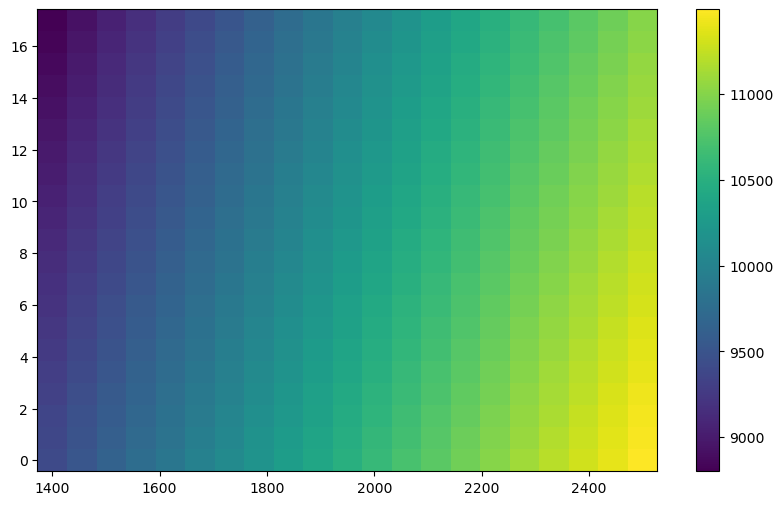

In [200]:
#forsterite

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 21)
yi = np.linspace(min(y), max(y), 21)
zi = z.reshape(len(xi), len(yi))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

plt.show()


In [201]:
vp_narray = np.array(vp_list)

In [202]:
print(vp_narray)

[[1.40000000e+03 0.00000000e+00 9.40647746e+03]
 [1.40000000e+03 8.50000000e-01 9.52173749e+03]
 [1.40000000e+03 1.70000000e+00 9.63561890e+03]
 ...
 [2.50000000e+03 1.53000000e+01 1.08036329e+04]
 [2.50000000e+03 1.61500000e+01 1.09041346e+04]
 [2.50000000e+03 1.70000000e+01 1.10037184e+04]]


In [203]:
vp_narray[:, 2] *=transmat.flatten()
vp_narray[:, -1][vp_narray[:, -1] == 0] = 2.144

In [204]:
vp_narray

array([[1.40000000e+03, 0.00000000e+00, 9.40647746e+03],
       [1.40000000e+03, 8.50000000e-01, 8.38230290e+03],
       [1.40000000e+03, 1.70000000e+00, 7.32949411e+03],
       ...,
       [2.50000000e+03, 1.53000000e+01, 1.08036329e+04],
       [2.50000000e+03, 1.61500000e+01, 2.14400000e+00],
       [2.50000000e+03, 1.70000000e+01, 2.14400000e+00]])

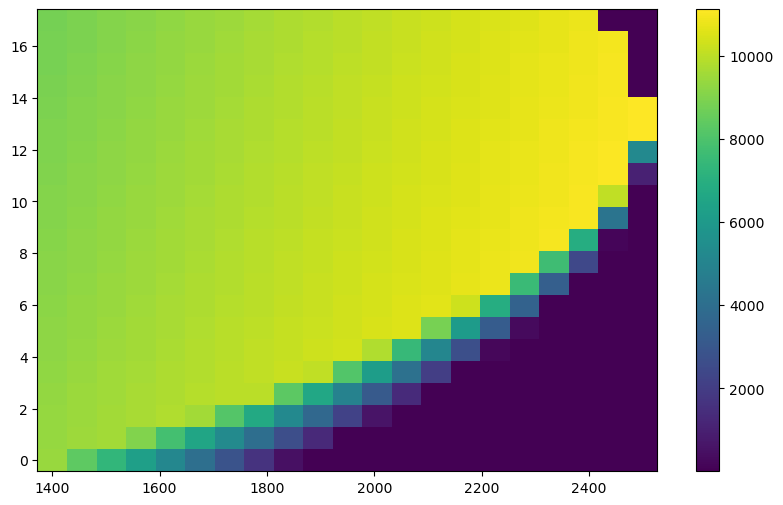

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_narray)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 21)
yi = np.linspace(min(y), max(y), 21)
zi = z.reshape(len(xi), len(yi))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

plt.show()

<img src="~/Documents/melt.png" alt="Alternative text" />

In [207]:
<img src="~/Documents/melt.png" alt="Alternative text" />

SyntaxError: invalid syntax (284246907.py, line 1)

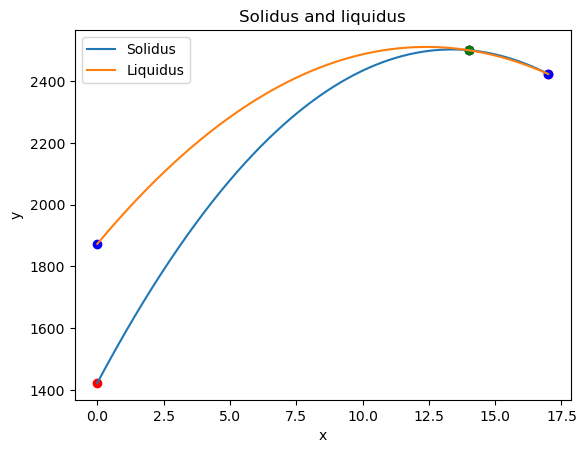

In [209]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

def inverted_quadratic_interpolation(x0, y0, x1, y1, x2, y2):
    x, a, b, c = symbols('x a b c')
    
    # Quadratic equation: y = ax^2 + bx + c
    eq1 = a*x0**2 + b*x0 + c - y0
    eq2 = a*x1**2 + b*x1 + c - y1
    eq3 = a*x2**2 + b*x2 + c - y2
    
    # Solving the system of equations
    solution = solve((eq1, eq2, eq3), (a, b, c))
    
    # Forming the quadratic function
    a_val, b_val, c_val = solution[a], solution[b], solution[c]
    quadratic_function = a_val*x**2 + b_val*x + c_val
    
    return quadratic_function

# Given points for the first set
x0_1, y0_1 = 0, 1423
x1_1, y1_1 = 17, 2423
x2_1, y2_1 = 14, 2500

# Get the inverted quadratic function for the first set
quadratic_function_1 = inverted_quadratic_interpolation(x0_1, y0_1, x1_1, y1_1, x2_1, y2_1)

# Given points for the second set
x0_2, y0_2 = 0, 1873
x1_2, y1_2 = 17, 2423
x2_2, y2_2 = 14, 2500

# Get the inverted quadratic function for the second set
quadratic_function_2 = inverted_quadratic_interpolation(x0_2, y0_2, x1_2, y1_2, x2_2, y2_2)

# Generate x values for plotting
x_values = np.linspace(0, 17, 1000)

# Calculate y values for both functions
y_values_1 = [quadratic_function_1.subs('x', val) for val in x_values]
y_values_2 = [quadratic_function_2.subs('x', val) for val in x_values]

# Plot both quadratic functions
plt.plot(x_values, y_values_1, label='Solidus')
plt.plot(x_values, y_values_2, label='Liquidus')

# Mark the given points for both sets
plt.scatter([x0_1, x1_1, x2_1], [y0_1, y1_1, y2_1], color='red')
plt.scatter([x0_2, x1_2, x2_2], [y0_2, y1_2, y2_2], color='blue')

# Mark the maximum point for both sets
plt.scatter(14, 2500, color='green')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solidus and liquidus')
plt.legend()

# Show the plot
plt.show()